## pmcpy quickstart

In [1]:
# import necessary package
import pmcpy
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### load the raw output file from PartMC

In [2]:
# define the path to data
p = "../data/urban_plume_0001_00000002.nc"
pmc = pmcpy.load_pmc(p)

### number concentration

In [3]:
print("overall number conc.:", pmc.get_num_conc(), "# m^{-3}")
print("diameter<=2.5um:", pmc.get_num_conc(pmc.get_aero_particle_diameter()<=2.5e-6), "# m^{-3}")
print("diameter>=2.5um:", pmc.get_num_conc(pmc.get_aero_particle_diameter()>=2.5e-6), "# m^{-3}")

overall number conc.: 8854807162.459946 # m^{-3}
diameter<=2.5um: 8854806282.274422 # m^{-3}
diameter>=2.5um: 880.1855249722205 # m^{-3}


### mass concentration

In [4]:
print("overall mass conc.:", 
      pmc.get_mass_conc(dry=False), "kg m^{-3}")
print("overall dry mass conc.:", 
      pmc.get_mass_conc(dry=True), "kg m^{-3}")
print("PM2.5 mass conc. (with water):",
      pmc.get_mass_conc(dry=False, part_cond=pmc.get_aero_particle_diameter()<=2.5e-6), "kg m^{-3}")

overall mass conc.: 2.2186891469474523e-08 kg m^{-3}
overall dry mass conc.: 1.316284475347949e-08 kg m^{-3}
PM2.5 mass conc. (with water): 2.2164289553077805e-08 kg m^{-3}


### aerosol density

In [5]:
print("overall density.:", 
      pmc.get_aero_density(dry=False), "kg m^{-3}")
print("overall dry density:", 
      pmc.get_aero_density(dry=True), "kg m^{-3}")
print("PM2.5 density (with water):",
      pmc.get_aero_density(dry=False, part_cond=pmc.get_aero_particle_diameter()<=2.5e-6), "kg m^{-3}")

overall density.: 1179.020687087021 kg m^{-3}
overall dry density: 2265.3505453667535 kg m^{-3}
PM2.5 density (with water): 1178.3768174927013 kg m^{-3}


### gas mixing ratio

In [6]:
gas_list = ['CO','O3']
pmc.get_gas_mixing_ratio(gas_list)

<xarray.DataArray 'gas_mixing_ratio' (gas_species: 2)>
array([354.311384,  43.069374])
Coordinates:
  * gas_species  (gas_species) int32 17 11
Attributes:
    unit:       ppb
    long_name:  mixing ratios of gas species

### mixing state index calculation

based on `group_list`

In [7]:
group_list = [['SO4','Cl','ARO1','ARO2','ALK1','OLE1',
                'API1','API2','LIM1','LIM2','Na'],
              ['BC','OC','OIN']]
pmc.get_mixing_state_index(group_list=group_list, diversity=False)

0.838104186813985

based on all species (``without water``)

In [8]:
pmc.get_mixing_state_index(drop_list=["H2O"], diversity=False)

0.6471920046172537

specific `range of diameters` and display `diversity` ($D_\alpha$, $D_\gamma$, $\chi$)

In [9]:
pmc.get_mixing_state_index(drop_list=["H2O"], 
                           part_cond=pmc.get_aero_particle_diameter()<=2.5e-6, 
                           diversity=True)

(3.1876143541221276, 4.355134759609094, 0.6520198176412461)

### particle size distribution visualization (number concentration v.s. diameter)

overall number concentration

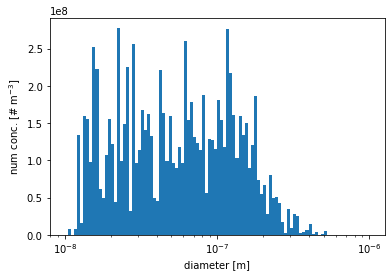

In [10]:
# get 
aero_diameter = pmc.get_aero_particle_diameter()
num_conc_per_particle = pmc.ds["aero_num_conc"]

# setup the 111 bins ranged from 10^-8 to 10^-6
bins = np.logspace(-8,-6,2*50+1)

# plot the number distribution
plt.hist(aero_diameter, bins=bins, weights=num_conc_per_particle)
plt.xscale('log')
plt.xlabel('diameter [m]')
plt.ylabel(r'num conc. [# m$^{-3}$]')
plt.show()

number concentration for particles with diameters between 1$\mu$m and 2.5$\mu$m

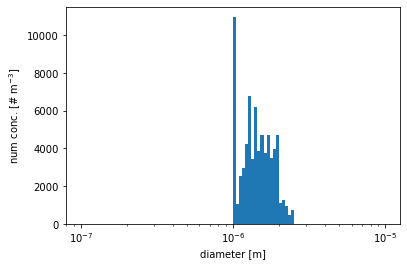

In [11]:
# get the diameters of all particles
aero_diameter = pmc.get_aero_particle_diameter()
# select particles with diameters between 1um and 2.5um
part_cond = (aero_diameter<=2.5e-6) & (aero_diameter>=1.0e-6)

aero_diameter_cond = aero_diameter[part_cond]
num_conc_per_particle_cond = pmc.ds["aero_num_conc"][part_cond]

# setup the 111 bins ranged from 10^-8 to 10^-6
bins = np.logspace(-7,-5,2*50+1)

# plot the number distribution
plt.hist(aero_diameter_cond, bins=bins, weights=num_conc_per_particle_cond)
plt.xscale('log')
plt.xlabel('diameter [m]')
plt.ylabel(r'num conc. [# m$^{-3}$]')
plt.show()